This script reads csv files generated by the export function of FreezFrame and turns them to pandas df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os.path import join, basename
from glob import glob
import fnmatch

import pandas as pd
import seaborn as sns

In [ ]:
def ff_formatter(csv, cohort, meta=False,
              mean_freezing=True):
  """Formats .csv file exported with FreezFrame. 
  
  Parameters:
  ===========
  csv: path-like
    path to the csv file
  cohort: str
    name of the mouse cohort
  meat: bool
    if True then prints out some info found in the csv file
  mean_freezing: bool
    if true then calculates the mean interval freezing
    
  Returns:
  ========
  df: pandas DataFrame object
  """
  df = pd.read_csv(csv, header=1)
  
  if meta==True:
    csv_meta_data(df)

  cols_to_drop =fnmatch.filter(df.columns, 'Unnamed*')
  cols_to_drop.extend(['Threshold','Bout duration', 'Protocol'])
  df.drop(labels=cols_to_drop ,axis=1, inplace=True)
  df.drop(index=0, inplace=True)
  df.rename({'Onset': "mouse_id"}, inplace=True, axis=1)
  df['cohort_id'] = cohort+'_'+df.mouse_id
  df.drop(labels='mouse_id', axis=1, inplace=True)
  df.set_index('cohort_id', drop=True, inplace=True)
  if mean_freezing == True:
    try:
      df.apply(pd.to_numeric)
      df['mean_freezing'] = df.mean(axis=1).round(2)
    except:
      print(f'\n Cannot calculate the mean maybe check for NaN-s\n')
    
  return df

In [ ]:
def csv_meta_data(df):
  """
  extract meta data from csv file
  Parametrs:
  ==========
  df: pandas DataFrame
    csv convered to dataframe e.g. pd.read_csv()
  """
  bout_dur = df.loc[:,'Bout duration'][1]
  prot = df.loc[:,'Protocol'][1]
  interval_dur = df.iloc[0].unique()
  print(f'Bout duration: {bout_dur}')
  print(f'Protocol: {prot}')
  print(f'Interval durations:{interval_dur}')
  if df.loc[:,'Protocol'].nunique()==1:
    print('all protocols are the same')
  else:
    print(f'there may be different potocols in the csv')


In [ ]:
target_pattern = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/**/*/*/*.csv'

In [ ]:
csv_list = glob(target_pattern, recursive=True)
for i, item in enumerate(csv_list, 0):
  print(i, item)

0 /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day1/export/freeze_Pat_Sep_day1.csv
1 /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day1/export/freeze_Pat_Sep_day1_custom.csv
2 /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day2/export/freeze_Pat_Sep_day2_final.csv
3 /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day3/afternoon/export/freeze_Pat_Sep_day2_A.csv
4 /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day3/morning/export/freeze_Pat_Sep_day3.csv
5 /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day5/morning/export/freeze_Pat_Sep_day5_A.csv
6 /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day5/afternoon/export/freeze_Pat_Sep_day5_B.csv
7 /content/drive/Shar

In [ ]:
print(f"session: {csv_list[1]}")
day1 = ff_formatter(csv_list[1], 'ptsd11', meta=True)
day1.drop(labels=['ptsd11_test1', 'ptsd11_test2', 'ptsd11_test3',
                  'ptsd11_test4', 'ptsd11_test5'], inplace=True, axis=0)
day1 = day1.apply(pd.to_numeric)
day1['mean_freezing'] = day1.mean(axis=1).round(2)
day1['day']= '1.'
day1['context'] = 'C'
day1

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day1/export/freeze_Pat_Sep_day1_custom.csv
Bout duration: 1.0
Protocol: 10randShock
Interval durations:['Duration' '292.00' '434.00' '300.00' ' 60.00' '356.00' '287.00' '248.00'
 '409.00' '262.00' '422.00' '357.00' '222.00' nan nan nan nan nan nan nan]
there may be different potocols in the csv

 Cannot calculate the mean maybe check for NaN-s



,0.00,294.00,729.00,180.00,1030.00,1387.00,1675.00,1924.00,2334.00,2597.00,3020.00,3378.00,mean_freezing,day,context
cohort_id,,,,,,,,,,,,,,,
ptsd11_31-1,2.74,10.70,5.60,3.56,17.39,16.19,34.66,27.76,70.23,49.91,69.16,16.97,27.07,1.,C
ptsd11_31-2,0.00,0.00,0.00,0.00,0.00,0.37,2.05,0.65,1.02,0.38,0.75,2.41,0.64,1.,C
ptsd11_31-3,0.37,1.23,1.87,0.00,1.20,2.60,2.37,2.74,0.82,1.64,2.40,0.48,1.48,1.,C
ptsd11_31-4,0.00,0.31,0.00,0.00,1.12,0.00,0.97,1.63,0.92,2.97,37.43,45.25,7.55,1.,C
ptsd11_32-1,0.46,4.24,6.76,2.22,10.57,8.93,14.85,4.70,12.44,15.24,25.95,11.93,9.86,1.,C
ptsd11_32-2,0.00,1.35,0.89,0.00,0.90,0.47,0.65,1.31,1.73,2.47,0.67,7.59,1.50,1.,C
ptsd11_32-3,0.00,0.31,0.00,0.00,0.60,2.51,1.51,2.87,2.24,4.62,4.64,1.08,1.70,1.,C
ptsd11_32-4,0.00,0.00,0.00,0.00,0.00,0.37,0.86,1.89,1.83,0.44,5.16,10.12,1.72,1.,C
ptsd11_33-1,0.46,12.24,29.89,0.00,35.91,61.30,78.36,75.33,86.54,79.00,61.93,66.55,48.96,1.,C


In [ ]:
print(f"session: {csv_list[2]}")
day2 = ff_formatter(csv_list[2], 'ptsd11', meta=True)
day2.rename({'ptsd11_31-1.1': 'ptsd11_31-1', 'ptsd11_31-2.1': 'ptsd11_31-2',
                'ptsd11_31-3.1': 'ptsd11_31-3', 'ptsd11_31-4.1': 'ptsd11_31-4'},
            inplace=True, axis=0)
day2['day']= '2.'
day2['context'] = 'A'
day2

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day2/export/freeze_Pat_Sep_day2_final.csv
Bout duration: 1.0
Protocol: Pat_Sep_2
Interval durations:['Duration' 60.0 nan nan nan nan nan nan]
all protocols are the same


,0,60,120,180,mean_freezing,day,context
cohort_id,,,,,,,
ptsd11_32-1,0.00,0.00,3.11,4.50,1.90,2.,A
ptsd11_32-2,0.00,2.22,0.00,9.91,3.03,2.,A
ptsd11_32-3,0.00,0.00,0.00,3.60,0.90,2.,A
ptsd11_32-4,0.00,0.00,0.00,13.51,3.38,2.,A
ptsd11_33-1,4.02,18.67,14.22,9.01,11.48,2.,A
ptsd11_33-2,0.00,21.78,35.56,13.51,17.71,2.,A
ptsd11_33-3,0.00,40.89,7.11,26.13,18.53,2.,A
ptsd11_33-4,2.68,27.11,6.67,9.91,11.59,2.,A
ptsd11_34-1,0.00,4.02,8.00,54.05,16.52,2.,A


In [ ]:
print(f"session: {csv_list[4]}")
day_3_m = ff_formatter(csv_list[4], 'ptsd11', meta=True)
day_3_m.drop(labels=['ptsd11_test2'], axis=0, inplace=True)
day_3_m['day']= '3.'
day_3_m['context'] = 'D'
day_3_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day3/morning/export/freeze_Pat_Sep_day3.csv
Bout duration: 1.0
Protocol: 3 min context
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
there may be different potocols in the csv


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,23.89,24.00,6.67,18.19,3.,D
ptsd11_31-2,6.19,4.89,5.78,5.62,3.,D
ptsd11_31-3,6.19,10.22,8.00,8.14,3.,D
ptsd11_31-4,0.00,4.00,0.00,1.33,3.,D
ptsd11_32-1,3.11,3.98,5.78,4.29,3.,D
ptsd11_32-2,8.44,16.37,16.89,13.90,3.,D
ptsd11_32-3,5.33,5.75,3.56,4.88,3.,D
ptsd11_32-4,13.33,19.03,11.11,14.49,3.,D
ptsd11_33-1,49.56,12.39,38.67,33.54,3.,D


In [ ]:
print(f"session: {csv_list[3]}")
day_3_a = ff_formatter(csv_list[3], 'ptsd11', meta=True)
day_3_a.drop(labels=['ptsd11_31-1', 'ptsd11_31-2', 'ptsd11_31-3',
                  'ptsd11_31-4'], inplace=True, axis=0)
day_3_a.rename({'ptsd11_31-1.1': 'ptsd11_31-1', 'ptsd11_31-2.1': 'ptsd11_31-2',
                'ptsd11_31-3.1': 'ptsd11_31-3', 'ptsd11_31-4.1': 'ptsd11_31-4'},
            inplace=True, axis=0)
day_3_a = day_3_a.apply(pd.to_numeric)
day_3_a['mean_freezing'] = day_3_a.mean(axis=1).round(2)
day_3_a['day']= '3.'
day_3_a['context'] = 'A'
day_3_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day3/afternoon/export/freeze_Pat_Sep_day2_A.csv
Bout duration: 1.0
Protocol: Pat_Sep_2
Interval durations:['Duration' ' 60.00' nan nan nan nan nan nan nan]
there may be different potocols in the csv

 Cannot calculate the mean maybe check for NaN-s



,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,7.14,33.78,24.11,21.68,3.,A
ptsd11_31-2,38.84,29.33,18.30,28.82,3.,A
ptsd11_31-3,0.00,1.78,6.25,2.68,3.,A
ptsd11_31-4,15.62,5.33,5.36,8.77,3.,A
ptsd11_32-1,3.57,31.56,58.04,31.06,3.,A
ptsd11_32-2,36.61,59.11,47.32,47.68,3.,A
ptsd11_32-3,19.64,24.89,9.37,17.97,3.,A
ptsd11_32-4,11.16,7.11,25.45,14.57,3.,A
ptsd11_33-1,16.96,29.33,51.79,32.69,3.,A


In [ ]:
print(f"session: {csv_list[7]}")
day_4_m = ff_formatter(csv_list[7], 'ptsd11', meta=True)
day_4_m['day']= '4.'
day_4_m['context'] = 'B'
day_4_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day4/morning/export/freeze_Pat_Sep_day4_B.csv
Bout duration: 1.0
Protocol: 3 min context
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,0.00,3.56,21.87,8.48,4.,B
ptsd11_31-2,4.02,8.00,16.52,9.51,4.,B
ptsd11_31-3,0.00,5.78,4.02,3.27,4.,B
ptsd11_31-4,0.00,4.44,14.29,6.24,4.,B
ptsd11_32-1,0.00,16.00,19.64,11.88,4.,B
ptsd11_32-2,6.25,13.78,39.73,19.92,4.,B
ptsd11_32-3,0.00,6.22,3.57,3.26,4.,B
ptsd11_32-4,0.00,12.00,26.34,12.78,4.,B
ptsd11_33-1,10.71,24.44,35.27,23.47,4.,B


In [ ]:
print(f"session: {csv_list[8]}")
day_4_a = ff_formatter(csv_list[8], 'ptsd11', meta=True)
day_4_a.drop(labels=['ptsd11_test'], inplace=True, axis=0)
day_4_a.drop(labels=['180.00'], inplace=True, axis=1)
day_4_a = day_4_a.apply(pd.to_numeric)
day_4_a['mean_freezing'] = day_4_a.mean(axis=1).round(2)
day_4_a['day']= '4.'
day_4_a['context'] = 'A'
day_4_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day4/afternoon/export/freeze_Pat_Sep_day4_A.csv
Bout duration: 1.0
Protocol: Pat_Sep_2
Interval durations:['Duration' ' 60.00' nan nan nan nan nan nan nan]
there may be different potocols in the csv

 Cannot calculate the mean maybe check for NaN-s



,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,0.00,12.44,37.78,16.74,4.,A
ptsd11_31-2,20.54,16.89,27.11,21.51,4.,A
ptsd11_31-3,6.25,14.22,25.78,15.42,4.,A
ptsd11_31-4,0.00,4.44,17.33,7.26,4.,A
ptsd11_32-1,9.82,22.67,15.11,15.87,4.,A
ptsd11_32-2,34.82,72.44,55.56,54.27,4.,A
ptsd11_32-3,18.30,19.11,10.22,15.88,4.,A
ptsd11_32-4,38.84,36.44,30.22,35.17,4.,A
ptsd11_33-1,0.00,23.11,40.44,21.18,4.,A


In [ ]:
print(f"session: {csv_list[5]}")
day_5_m = ff_formatter(csv_list[5], 'ptsd11', meta=True,
                       mean_freezing=False)
day_5_m.drop(labels=['180.00'], inplace=True, axis=1)
day_5_m = day_5_m.apply(pd.to_numeric)
day_5_m['mean_freezing'] = day_5_m.mean(axis=1).round(2)
day_5_m['day']= '5.'
day_5_m['context'] = 'A'
day_5_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day5/morning/export/freeze_Pat_Sep_day5_A.csv
Bout duration: 1.0
Protocol: Pat_Sep_2
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,58.48,74.22,77.33,70.01,5.,A
ptsd11_31-2,39.29,31.56,41.33,37.39,5.,A
ptsd11_31-3,43.75,47.11,33.33,41.40,5.,A
ptsd11_31-4,22.77,13.78,15.11,17.22,5.,A
ptsd11_32-1,4.46,6.22,7.56,6.08,5.,A
ptsd11_32-2,70.09,69.78,59.56,66.48,5.,A
ptsd11_32-3,46.43,30.22,47.56,41.40,5.,A
ptsd11_32-4,27.23,26.67,37.78,30.56,5.,A
ptsd11_33-1,24.55,48.00,36.00,36.18,5.,A


In [ ]:
print(f"session: {csv_list[6]}")
day_5_a = ff_formatter(csv_list[6], 'ptsd11', meta=True)
day_5_a['day']= '5.'
day_5_a['context'] = 'B'
day_5_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day5/afternoon/export/freeze_Pat_Sep_day5_B.csv
Bout duration: 1.0
Protocol: 3 min context
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,37.50,59.11,78.57,58.39,5.,B
ptsd11_31-2,19.64,40.89,52.68,37.74,5.,B
ptsd11_31-3,21.87,75.11,47.77,48.25,5.,B
ptsd11_31-4,12.05,48.00,16.96,25.67,5.,B
ptsd11_32-1,43.75,40.44,22.32,35.50,5.,B
ptsd11_32-2,42.41,55.11,60.27,52.60,5.,B
ptsd11_32-3,44.64,70.22,58.04,57.63,5.,B
ptsd11_32-4,41.52,53.33,44.20,46.35,5.,B
ptsd11_33-1,17.86,53.78,59.37,43.67,5.,B


In [ ]:
print(f"session: {csv_list[15]}")
day_6_m = ff_formatter(csv_list[15], 'ptsd11', meta=True)
day_6_m['day']= '6.'
day_6_m['context'] = 'B'
day_6_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day6/morning/export/freeze_Pat_Sep_day6_B.csv
Bout duration: 1.0
Protocol: 3 min context
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,47.32,71.11,50.89,56.44,6.,B
ptsd11_31-2,21.43,21.78,25.45,22.89,6.,B
ptsd11_31-3,33.04,50.22,45.54,42.93,6.,B
ptsd11_31-4,23.21,51.56,76.79,50.52,6.,B
ptsd11_32-1,10.27,25.33,41.07,25.56,6.,B
ptsd11_32-2,21.43,68.44,75.45,55.11,6.,B
ptsd11_32-3,30.80,47.11,56.25,44.72,6.,B
ptsd11_32-4,4.46,8.00,24.55,12.34,6.,B
ptsd11_33-1,66.07,43.95,41.96,50.66,6.,B


In [ ]:
print(f"session: {csv_list[16]}")
day_6_a = ff_formatter(csv_list[16], 'ptsd11', meta=True,
                       mean_freezing=False)
day_6_a.drop(labels=['180.00'], inplace=True, axis=1)
day_6_a = day_6_a.apply(pd.to_numeric)
day_6_a['mean_freezing'] = day_6_a.mean(axis=1).round(2)
day_6_a['day']= '6.'
day_6_a['context'] = 'A'
day_6_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day6/afternoon/export/freeze_Pat_Sep_day6_A.csv
Bout duration: 1.0
Protocol: Pat_Sep_2
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,47.77,73.78,68.44,63.33,6.,A
ptsd11_31-2,25.89,52.44,51.11,43.15,6.,A
ptsd11_31-3,56.25,60.00,52.44,56.23,6.,A
ptsd11_31-4,32.14,48.00,73.78,51.31,6.,A
ptsd11_32-1,62.05,64.00,28.44,51.50,6.,A
ptsd11_32-2,58.93,51.11,82.67,64.24,6.,A
ptsd11_32-3,11.16,46.22,45.78,34.39,6.,A
ptsd11_32-4,16.07,50.22,57.33,41.21,6.,A
ptsd11_33-1,17.41,64.00,54.46,45.29,6.,A


In [ ]:
print(f"session: {csv_list[10]}")
day_7_m = ff_formatter(csv_list[10], 'ptsd11', meta=True)
day_7_m.drop(labels=['ptsd11_1', 'ptsd11_2', 'ptsd11_3',
                  'ptsd11_4'], inplace=True, axis=0)
day_7_m.drop(labels=['180.00'], inplace=True, axis=1)
day_7_m.rename({'ptsd11_31-1.1': 'ptsd11_31-1','ptsd11_31-2.1': 'ptsd11_31-2',
             'ptsd11_31-3.1': 'ptsd11_31-3', 'ptsd11_31-4.1': 'ptsd11_31-4'},
            inplace=True, axis=0)
day_7_m = day_7_m.apply(pd.to_numeric)
day_7_m['mean_freezing'] = day_7_m.mean(axis=1).round(2)
day_7_m['day']= '7.'
day_7_m['context'] = 'A'
day_7_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day7/morning/export/freeze_Pat_Sep_day7_A.csv
Bout duration: 1.0
Protocol: test
Interval durations:['Duration' ' 60.00' nan nan nan nan nan nan nan]
there may be different potocols in the csv

 Cannot calculate the mean maybe check for NaN-s



,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,45.54,71.56,72.89,63.33,7.,A
ptsd11_31-2,70.98,69.78,54.22,64.99,7.,A
ptsd11_31-3,17.86,60.00,82.22,53.36,7.,A
ptsd11_31-4,51.79,64.00,47.56,54.45,7.,A
ptsd11_32-1,8.48,22.22,24.89,18.53,7.,A
ptsd11_32-2,56.25,59.11,58.22,57.86,7.,A
ptsd11_32-3,69.20,70.67,64.44,68.10,7.,A
ptsd11_32-4,50.45,64.00,74.67,63.04,7.,A
ptsd11_33-1,63.84,67.56,76.89,69.43,7.,A


In [ ]:
print(f"session: {csv_list[9]}")
day_7_a = ff_formatter(csv_list[9], 'ptsd11', meta=True)
day_7_a['day']= '7.'
day_7_a['context'] = 'B'
day_7_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day7/afternoon/export/freeze_Pat_Sep_day7_B.csv
Bout duration: 1.0
Protocol: 3 min context
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,50.45,79.11,69.20,66.25,7.,B
ptsd11_31-2,28.12,51.56,58.04,45.91,7.,B
ptsd11_31-3,56.25,49.33,63.39,56.32,7.,B
ptsd11_31-4,9.82,60.44,59.82,43.36,7.,B
ptsd11_32-1,21.87,69.78,47.77,46.47,7.,B
ptsd11_32-2,27.68,45.33,61.61,44.87,7.,B
ptsd11_32-3,63.84,53.33,68.30,61.82,7.,B
ptsd11_32-4,62.50,59.11,70.98,64.20,7.,B
ptsd11_33-1,39.29,42.22,82.14,54.55,7.,B


In [ ]:
print(f"session: {csv_list[14]}")
day_8_m = ff_formatter(csv_list[14], 'ptsd11', meta=True)
day_8_m.drop(labels=['ptsd11_1', 'ptsd11_2', 'ptsd11_3',
                  'ptsd11_4', 'ptsd11_5'], inplace=True, axis=0)
day_8_m.drop(labels=['180.00'], inplace=True, axis=1)
day_8_m = day_8_m.apply(pd.to_numeric)
day_8_m['mean_freezing'] = day_8_m.mean(axis=1).round(2)
day_8_m['day']= '8.'
day_8_m['context'] = 'A'
day_8_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day8/morning/export/freeze_Pat_Sep_day8_A.csv
Bout duration: 1.0
Protocol: test
Interval durations:['Duration' ' 60.00' nan nan nan nan nan nan nan]
there may be different potocols in the csv

 Cannot calculate the mean maybe check for NaN-s



,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,58.93,40.00,59.56,52.83,8.,A
ptsd11_31-2,44.64,73.78,77.78,65.40,8.,A
ptsd11_31-3,61.16,60.44,86.22,69.27,8.,A
ptsd11_31-4,34.82,65.33,69.33,56.49,8.,A
ptsd11_32-1,8.93,44.00,62.67,38.53,8.,A
ptsd11_32-2,47.77,62.22,40.44,50.14,8.,A
ptsd11_32-3,35.27,68.44,71.56,58.42,8.,A
ptsd11_32-4,63.39,68.89,61.78,64.69,8.,A
ptsd11_33-1,21.87,33.33,26.22,27.14,8.,A


In [ ]:
print(f"session: {csv_list[13]}")
day_8_a = ff_formatter(csv_list[13], 'ptsd11', meta=True)
day_8_a['day']= '8.'
day_8_a['context'] = 'B'
day_8_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day8/afternoon/export/freeze_Pat_Sep_day8_B.csv
Bout duration: 1.0
Protocol: 3 min context
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,37.50,81.78,82.59,67.29,8.,B
ptsd11_31-2,27.68,48.00,55.80,43.83,8.,B
ptsd11_31-3,44.64,56.44,75.00,58.69,8.,B
ptsd11_31-4,41.07,45.78,60.27,49.04,8.,B
ptsd11_32-1,20.98,58.67,53.57,44.41,8.,B
ptsd11_32-2,79.91,26.67,50.00,52.19,8.,B
ptsd11_32-3,54.91,58.22,80.36,64.50,8.,B
ptsd11_32-4,50.45,81.33,70.54,67.44,8.,B
ptsd11_33-1,45.98,42.22,73.21,53.80,8.,B


In [ ]:
print(f"session: {csv_list[12]}")
day_9_m = ff_formatter(csv_list[12], 'ptsd11', meta=True)
day_9_m.drop(labels=['ptsd11_1', 'ptsd11_t'], inplace=True, axis=0)
day_9_m = day_9_m.apply(pd.to_numeric)
day_9_m['mean_freezing'] = day_9_m.mean(axis=1).round(2)
day_9_m['day']= '9.'
day_9_m['context'] = 'B'
day_9_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day9/morning/export/freeze_Pat_Sep_day9_B.csv
Bout duration: 1.0
Protocol: test
Interval durations:['Duration' ' 60.00' nan nan nan nan nan nan nan]
there may be different potocols in the csv

 Cannot calculate the mean maybe check for NaN-s



,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,33.04,41.33,50.00,41.46,9.,B
ptsd11_31-2,27.68,42.22,60.27,43.39,9.,B
ptsd11_31-3,22.32,66.22,30.80,39.78,9.,B
ptsd11_31-4,14.29,29.33,25.45,23.02,9.,B
ptsd11_32-1,48.66,53.78,48.21,50.22,9.,B
ptsd11_32-2,45.09,49.78,50.89,48.59,9.,B
ptsd11_32-3,41.52,52.44,67.41,53.79,9.,B
ptsd11_32-4,10.27,3.56,3.57,5.80,9.,B
ptsd11_33-1,56.70,47.11,88.84,64.22,9.,B


In [ ]:
print(f"session: {csv_list[11]}")
day_9_a = ff_formatter(csv_list[11], 'ptsd11', meta=True,
                       mean_freezing=False)
day_9_a.drop(labels=['180.00'], inplace=True, axis=1)
day_9_a['mean_freezing'] = day_9_a.mean(axis=1).round(2)
day_9_a['day']= '9.'
day_9_a['context'] = 'A'
day_9_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day9/afternoon/export/freeze_Pat_Sep_day9_A.csv
Bout duration: 1.0
Protocol: SEFL_day2
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,54.46,55.11,68.00,59.19,9.,A
ptsd11_31-2,44.64,64.44,79.11,62.73,9.,A
ptsd11_31-3,37.95,76.44,71.56,61.98,9.,A
ptsd11_31-4,56.25,80.00,90.22,75.49,9.,A
ptsd11_32-1,46.87,49.78,76.00,57.55,9.,A
ptsd11_32-2,81.70,55.56,28.44,55.23,9.,A
ptsd11_32-3,63.39,57.78,68.44,63.20,9.,A
ptsd11_32-4,9.37,52.00,66.67,42.68,9.,A
ptsd11_33-1,29.46,41.33,67.11,45.97,9.,A


In [ ]:
print(f"session: {csv_list[17]}")
day_10_m = ff_formatter(csv_list[17], 'ptsd11', meta=True)
day_10_m['day']= '10.'
day_10_m['context'] = 'B'
day_10_m

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day10/morning/export/freeze_Pat_Sep_day10_B.csv
Bout duration: 1.0
Protocol: 3 min context
Interval durations:['Duration' 60.0 nan nan nan nan nan nan nan]
all protocols are the same


,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,35.27,76.44,71.87,61.19,10.,B
ptsd11_31-2,12.05,28.44,45.54,28.68,10.,B
ptsd11_31-3,25.89,32.00,28.57,28.82,10.,B
ptsd11_31-4,48.21,61.78,61.16,57.05,10.,B
ptsd11_32-1,15.62,23.11,44.20,27.64,10.,B
ptsd11_32-2,41.07,48.89,54.46,48.14,10.,B
ptsd11_32-3,60.71,87.11,75.00,74.27,10.,B
ptsd11_32-4,45.54,64.00,76.79,62.11,10.,B
ptsd11_33-1,58.48,64.89,81.25,68.21,10.,B


In [ ]:
print(f"session: {csv_list[18]}")
day_10_a = ff_formatter(csv_list[18], 'ptsd11', meta=True)
day_10_a.drop(labels=['ptsd11_1', 'ptsd11_2', 'ptsd11_3'], inplace=True, axis=0)
day_10_a.drop(labels=['180.00'], inplace=True, axis=1)
day_10_a = day_10_a.apply(pd.to_numeric)
day_10_a['mean_freezing'] = day_10_a.mean(axis=1).round(2)
day_10_a['day']= '10.'
day_10_a['context'] = 'A'
day_10_a

session: /content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/PTSD11_shockboxes/PS_day10/afternoon/export/freeze_Pat_Sep_day10_A.csv
Bout duration: 1.0
Protocol: test
Interval durations:['Duration' ' 60.00' nan nan nan nan nan nan nan]
there may be different potocols in the csv

 Cannot calculate the mean maybe check for NaN-s



,0.00,60.00,120.00,mean_freezing,day,context
cohort_id,,,,,,
ptsd11_31-1,45.98,82.22,83.11,70.44,10.,A
ptsd11_31-2,58.48,37.78,31.11,42.46,10.,A
ptsd11_31-3,4.02,22.22,44.89,23.71,10.,A
ptsd11_31-4,58.93,87.56,86.67,77.72,10.,A
ptsd11_32-1,32.59,28.44,19.11,26.71,10.,A
ptsd11_32-2,66.52,56.44,72.00,64.99,10.,A
ptsd11_32-3,48.66,80.44,84.44,71.18,10.,A
ptsd11_32-4,54.02,73.78,64.89,64.23,10.,A
ptsd11_33-1,46.87,74.22,75.11,65.40,10.,A


In [ ]:
col_list = ['mean_freezing','day','context']
df_final = pd.concat([day1[col_list], day2[col_list], day_3_m[col_list],
                     day_4_m[col_list], day_5_m[col_list],day_6_m[col_list],
                     day_7_m[col_list], day_8_m[col_list], day_9_m[col_list],
                     day_10_m[col_list], day_3_a[col_list],
                     day_4_a[col_list], day_5_a[col_list],day_6_a[col_list],
                     day_7_a[col_list], day_8_a[col_list], day_9_a[col_list],
                     day_10_a[col_list]])
df_final

,mean_freezing,day,context
cohort_id,,,
ptsd11_31-1,27.07,1.,C
ptsd11_31-2,0.64,1.,C
ptsd11_31-3,1.48,1.,C
ptsd11_31-4,7.55,1.,C
ptsd11_32-1,9.86,1.,C
...,...,...,...
ptsd11_33-4,42.16,10.,A
ptsd11_34-1,62.90,10.,A
ptsd11_34-2,54.59,10.,A


In [ ]:
# saving
df_final.to_csv('/content/drive/Shareddrives/TuriLab/Data/PTSD_project/PTSD11_pattern_sep/ptsd11_mice_clean_freezing_data3.csv')

In [ ]:
ps = df_final[(df_final['context']=='A') | 
              (df_final['context']=='B')]
              

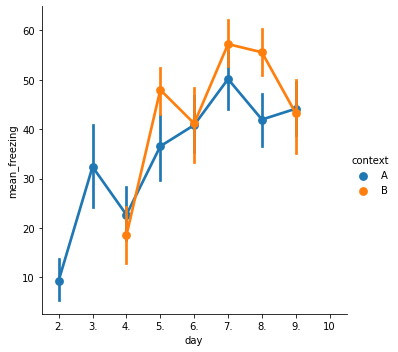

In [ ]:
sns.catplot(data=ps, x='day', y='mean_freezing', hue='context', kind='point',
            order=['2.', '3.', '4.', '5.', '6.', '7.', '8.',
                   '9.', '10'])